In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [4]:
##In this workbook, we will be working with the Wide receiver Position
wr=df[df['Position'] == 'WR']
wrcorr = wr.corr()
wrpos = wrcorr[wrcorr['Overall Rating'] >= 0.5]
wrneg = wrcorr[wrcorr['Overall Rating'] <= -0.5]
print(wrpos['Overall Rating'], wrneg['Overall Rating'])
#Here are the significant correlations for the wide receiver position

Awareness              0.898211
Ball Carrier Vision    0.579829
Catch In Traffic       0.713768
Catching               0.807168
Overall Rating         1.000000
Release                0.658981
Route Running          0.862600
Spectacular Catch      0.719158
Name: Overall Rating, dtype: float64 Series([], Name: Overall Rating, dtype: float64)


In [5]:
wrsig = wr[['Awareness', 'Ball Carrier Vision', 'Catch In Traffic', 'Release', 'Route Running']]
X = add_constant(wrsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Since all of our VIF scores are below 5, we can move on to statistical testing

const                  214.943323
Awareness                2.511456
Ball Carrier Vision      1.473518
Catch In Traffic         1.912053
Release                  1.654676
Route Running            2.931660
dtype: float64

In [6]:
WR = sm.OLS(wr['Overall Rating'], wrsig).fit()
print(WR.summary())
#It looks like our aic score is very high but all of our variables are significant
#According to the Durbin-Watson Statistic, it looks like there isn't a signifiicant amount of autocorrelation

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.774e+05
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:04:43   Log-Likelihood:                -994.59
No. Observations:                 512   AIC:                             1999.
Df Residuals:                     507   BIC:                             2020.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Awareness               0.2671    

In [7]:
def model():
    pv= 0.2671*wr['Awareness']+ 0.1801*wr['Ball Carrier Vision']+ 0.1971*wr['Catch In Traffic'] + 0.1556*wr['Release']+ 0.1740* wr['Route Running']
    return pv

In [8]:
wr['Predicted Values'] = model()
wr['Residual'] = wr['Predicted Values'] - wr['Overall Rating']

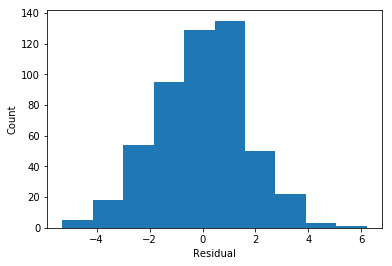

In [9]:
plt.hist(wr['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

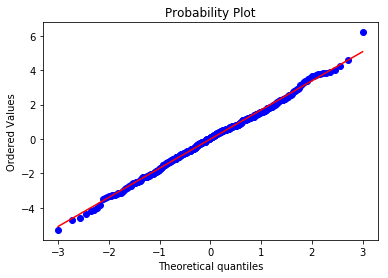

In [10]:
stats.probplot(wr['Residual'], plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

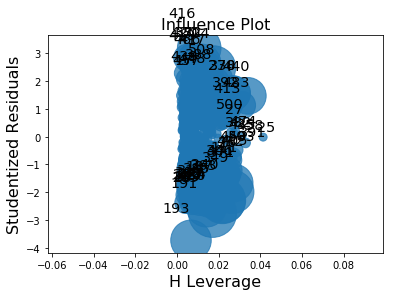

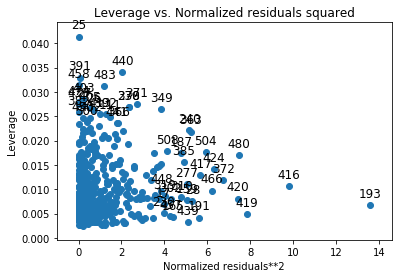

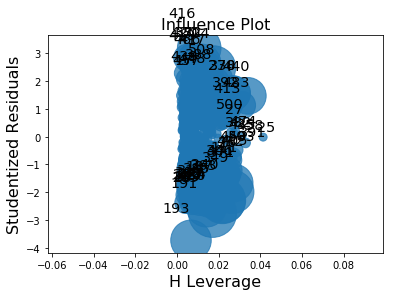

In [12]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(WR)
influence_plot(WR)
#There are some high residuals and high leverage points but none that meet both criteria so we will keep all of the data in the
#model

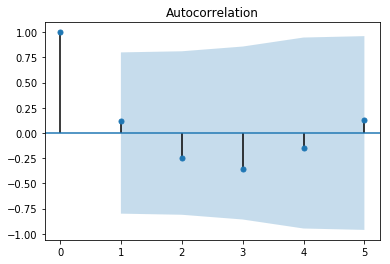

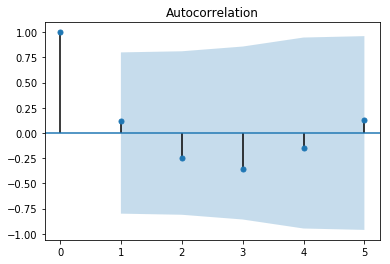

In [15]:
##Next we will double check for autocorrelation.  According to the Durbin Watson statistic, there is not a significant amount
#of auto correlation
wrcorr1 = wr[['Overall Rating','Awareness', 'Ball Carrier Vision', 'Catch In Traffic', 'Release', 'Route Running']].corr()
plot_acf(wrcorr1['Overall Rating'])
#There does not appear to be any significant autocorrelation in the model

In [16]:
#Finally, we move on to the Breusch Pagan test to check for heteroskedasticity
het_breuschpagan(wr['Residual'], wrsig)
#Based on the extremely low p-values, we can reject the null that there is heteroskedasticity present in the model

(161.97039290954746,
 5.524735687820857e-34,
 46.92116754793252,
 7.446112212482527e-40)

In [17]:
#Now that we have determined that we can use linear regression, let's run some tests and see how accuract our linear 
#regression model is
X_train, X_test, y_train, y_test = train_test_split(wrsig, wr['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
wrcv = cross_val_score(reg, wrsig, wr['Overall Rating'], cv=5)
wrcv_mean = np.mean(wrcv)
print(wrcv, wrcv_mean)
#It looks like our model explains an average of 95.15% of the variation in the data

[0.97420313 0.96950187 0.96502067 0.92447353 0.90598316] 0.947836472168096


In [42]:
#Now that we have determined that we can use linear regression, let's run some tests and see how accuract our linear 
#regression model is
X_train, X_test, y_train, y_test = train_test_split(wrsig6, wr['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
wrcv = cross_val_score(reg, wrsig6, wr['Overall Rating'], cv=5)
wrcv_mean = np.mean(wrcv)
print(wrcv, wrcv_mean)
#It looks like our model explains an average of 95.15% of the variation in the data

[0.97369955 0.96918221 0.96873935 0.92663625 0.91919419] 0.9514903110087731


In [19]:
wrsigdesc = wr[['Overall Rating','Awareness', 'Ball Carrier Vision', 'Catch In Traffic', 'Release', 'Route Running']]
wrsigdesc1 = wrsigdesc.describe()

In [20]:
wrsigdesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\wrsig.csv')